# Look at the basics from the slide [slide link](https://docs.google.com/presentation/d/1qJsFGbJ7GTuLEq0xpYEQ0HNBWPt6IXnD/edit#slide=id.p1) **first**

# Binary tree representation
There are two ways to represent binary trees:
- Dynamic Representation (Using Linked List)
- Sequential Representation (Using Array)


## Sequential Representation (Using Array) Conditions:
- If the height of the binary tree is h,  then, an array of maximum 2^(h+1) length is required.
- **The root is placed at index 1.**
- Any node that is placed at index i, will have its
    - **left child** placed at **2i**
    - **right child** at **2i+1**


# Binary Tree representation using Array

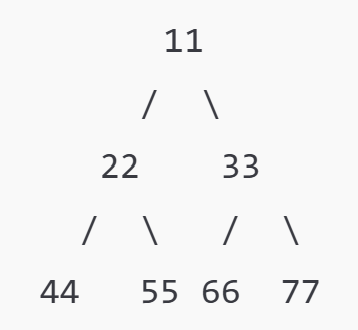

| Index 0 | Index 1 | Index 2 | Index 3 | Index 4 | Index 5 | Index 6 | Index 7 |
|---------|---------|---------|---------|---------|---------|---------|---------|
|    None  |    11   |    22   |    33   |    44   |    55   |    66   |    77   |



In [ ]:
import numpy as np

class Tree:
    def __init__(self, root, length):
        # Here the index of the root is 1. 0 index is empty
        self.tree = np.empty(length, dtype='object') # 0 to 7
        self.tree[1] = root  # Root is at index 1

    def set_child(self, parent_index, side, child):
        # #left child is 2i, right child 2i+1, here, i =  parent_index

        if side == 'left':
            child_index = parent_index * 2  # Left child index
            self.tree[child_index] = child
        elif side == 'right':
            child_index = parent_index * 2 + 1  # Right child index
            self.tree[child_index] = child

    def print_tree_array(self):
        for i in range(len(self.tree)):
            if self.tree[i] is not None:
                print(self.tree[i], end=" ")
            else:
                print("-", end=" ")  # Indicating an empty spot
        print()

# Driver Code
tree = Tree(root=11, length=8)  # Length is 8 to accommodate up to 7 nodes
"""
            11
         /      \
       22        33
      /  \      /    \
    44    55  66     77
"""
# Set children for each node
tree.set_child(parent_index=1, side='left', child=22)
tree.set_child(parent_index=1, side='right', child=33)
tree.set_child(parent_index=2, side='left', child=44)
tree.set_child(parent_index=2, side='right', child=55)
tree.set_child(parent_index=3, side='left', child=66)
tree.set_child(parent_index=3, side='right', child=77)

# Print the tree structure with indices
tree.print_tree_array()

- 11 22 33 44 55 66 77 


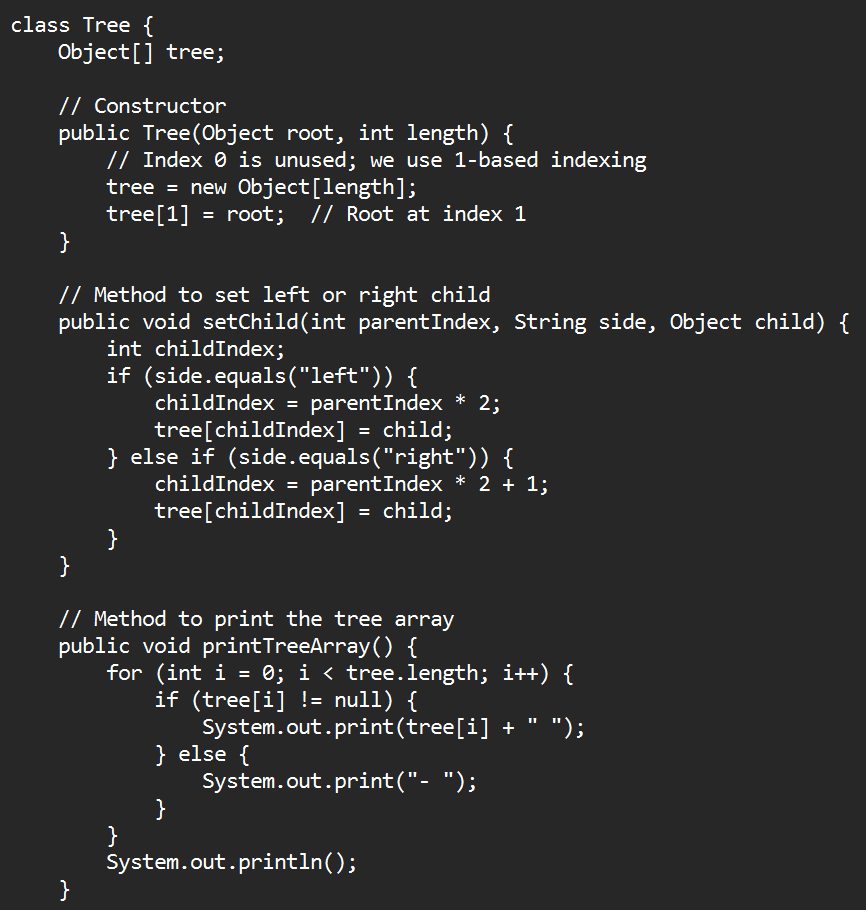

## Linked list based implementation (style01)

### Recursive Function: `arr_to_tree`

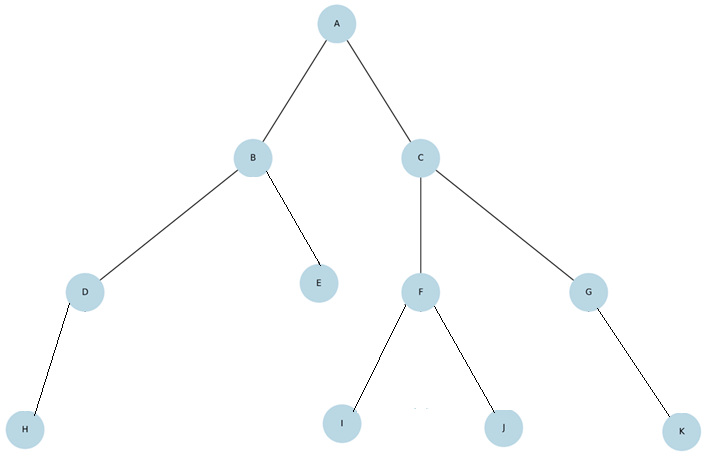

| Index | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9    | 10   | 11   | 12  | 13  | 14   | 15  |
|-------|-----|-----|-----|-----|-----|-----|-----|-----|------|------|------|------|-----|-----|------|-----|
| Value | None| "A" | "B" | "C" | "D" | "E" | "F" | "G" | "H" | None | None | None | "I" | "J" | None | "K" |




The function recursively builds the tree as follows:

    #### Base Case
    - If the current index `i` is out of bounds (`i >= arr.size`) or the element at `arr[i]` is `None`, the function returns `None`.
    - None-Indicates, no node exists at this position.

    #### Recursive Step
    1. **Create a Node**:
    - At index `i`, if `arr[i]` is not `None`, create a `TNode` with the value `arr[i]`.
    2. **Set Left Child**:
    - Recursively call `arr_to_tree` for the left child at index `2 * i`.
    3. **Set Right Child**:
    - Recursively call `arr_to_tree` for the right child at index `2 * i + 1`.


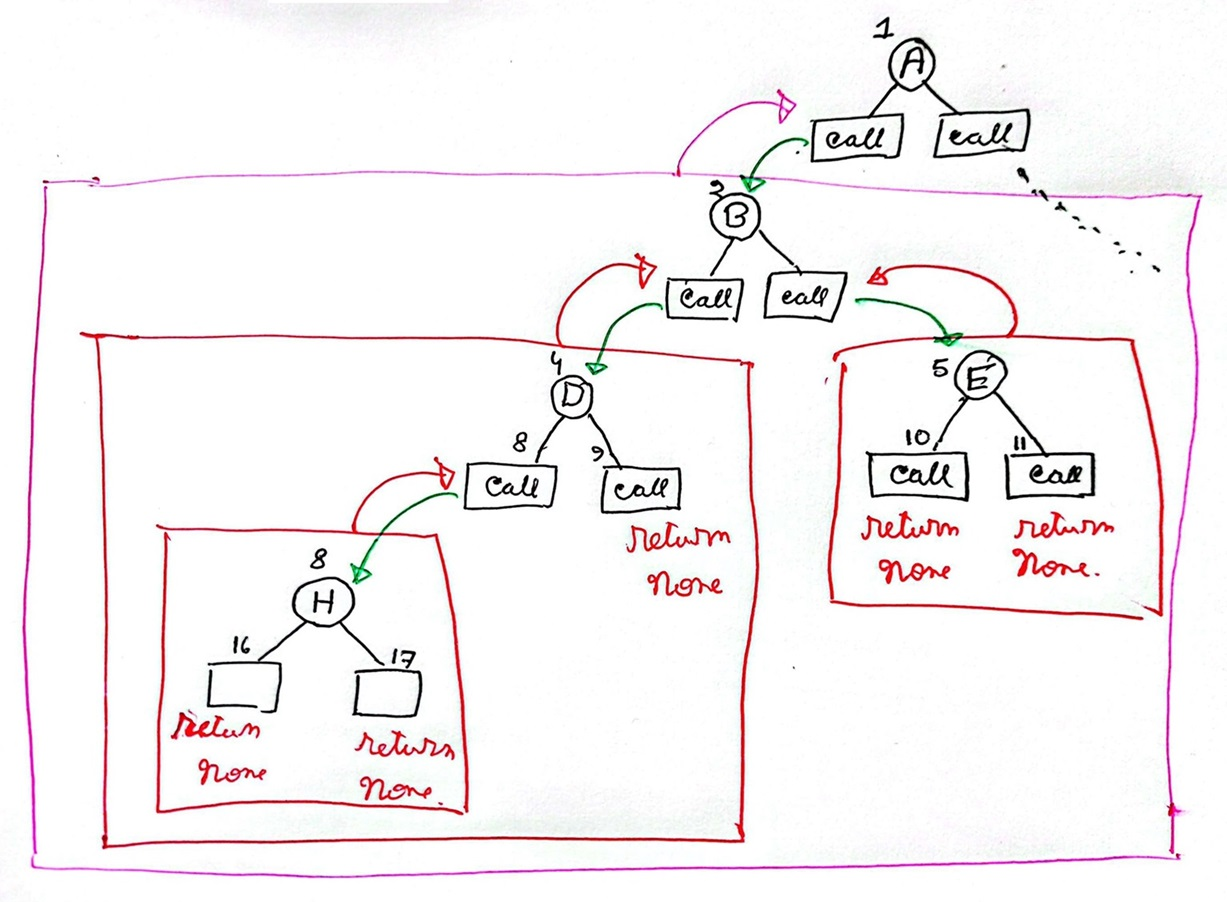

In [ ]:
import numpy as np

class TNode:
    def __init__(self, val, left=None, right=None):
        self.val = val    # Node value
        self.left = left  # Left child
        self.right = right  # Right child

#####################################################################

def arr_to_tree(arr, i=1):
    # Base Case: Check if index is out of bounds or the current element is None
    if i >= arr.size or arr[i] is None:
        return None

    # Recursive Case:
    # 1. Create a node for the current index
    root = TNode(arr[i])

    # 2. Set the left child by recursively calling for index 2 * i
    root.left = arr_to_tree(arr, 2 * i)

    # 3. Set the right child by recursively calling for index 2 * i + 1
    root.right = arr_to_tree(arr, 2 * i + 1)

    return root


# PreOrder Traversal (Root, Left, Right)
def print_preOrder(root):
    if root is not None: # recursive
        print(root.val, end=' ')  # Print node value
        print_preOrder(root.left)  # Traverse left
        print_preOrder(root.right)  # Traverse right

# InOrder Traversal (Left, Root, Right)
def print_inOrder(root):
    if root is not None:
        print_inOrder(root.left)  # Traverse left
        print(root.val, end=' ')  # Print node value
        print_inOrder(root.right)  # Traverse right

# PostOrder Traversal (Left, Right, Root)
def print_postOrder(root):
    if root is not None:
        print_postOrder(root.left)  # Traverse left
        print_postOrder(root.right)  # Traverse right
        print(root.val, end=' ')  # Print node value

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx
# Driver code

  # 0     1    2    3    4    5    6    7    8    9     10    11   12    13   14   15
# [None, "A", "B", "C", "D", "E", "F", "G", "H", None, None, None, "I", "J", None, "K"])

tree_arr = np.array([None, "A", "B", "C", "D", "E", "F", "G", "H", None, None, None, "I", "J", None, "K"])
root = arr_to_tree(tree_arr)

# Print tree traversals
print("PreOrder Traversal:", end=' ')
print_preOrder(root)
print("\nInOrder Traversal:", end=' ')
print_inOrder(root)
print("\nPostOrder Traversal:", end=' ')
print_postOrder(root)

PreOrder Traversal: A B D H E C F I J G K 
InOrder Traversal: H D B E A I F J C G K 
PostOrder Traversal: H D E B I J F K G C A 

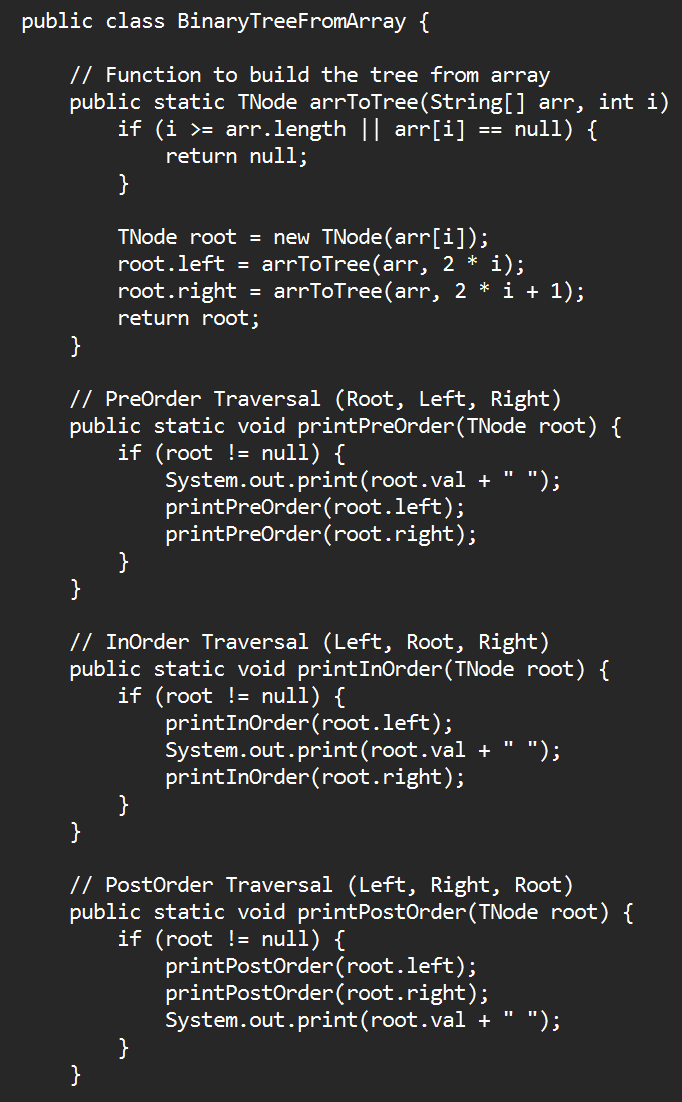

## Get level

**The level (or depth)** of a node n is equal to **the number of edges** from **the root to that node**

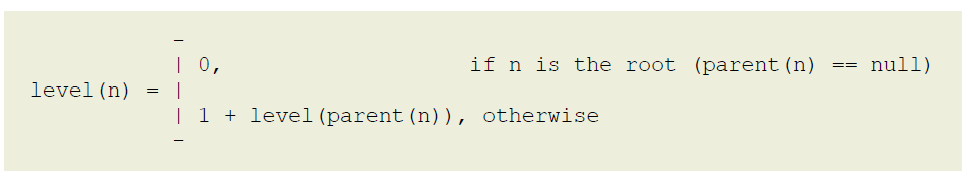

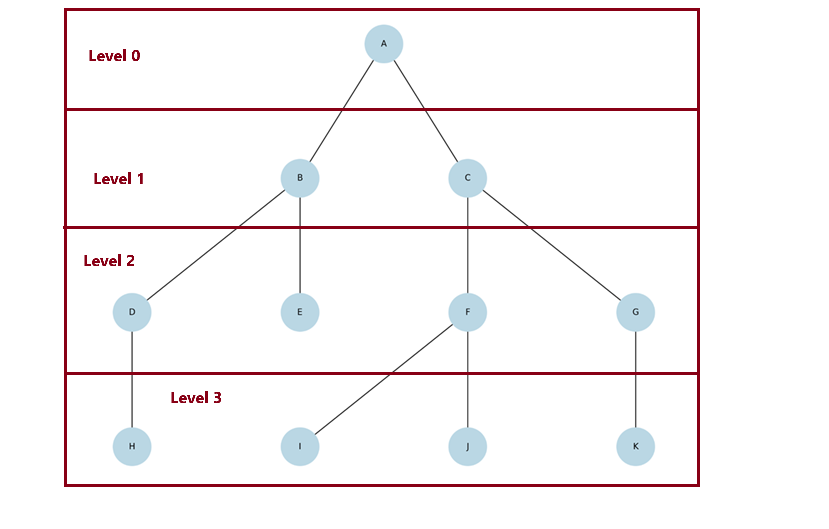

In [ ]:
import numpy as np

# Parameters are root, value of the node, default param level=0--root's
def get_level(root, value, level=0):

    # Base case: If the current node is None, return -1 (value not found)
    if root is None:
        return -1

    # If the current node matches the value, return the current level
    if root.val == value:
        return level

    # Recursive case: Search in the left subtree
    left_level = get_level(root.left, value, level + 1)

    # Recursive case: Search in the right subtree
    right_level = get_level(root.right, value, level + 1)

    # If value was not found in either subtree, return -1
    if left_level == -1 and right_level == -1:
        return -1

    # Return the level where the value was found,
    # either in the left or right subtree (whichever is not -1)
    #--because -1 means not found in that sub tree
    return max(left_level, right_level)


# Driver code

  # 0     1    2    3    4    5    6    7    8    9     10    11   12    13   14   15
# [None, "A", "B", "C", "D", "E", "F", "G", "H", None, None, None, "I", "J", None, "K"])

tree_arr = np.array([None, "A", "B", "C", "D", "E", "F", "G", "H", None, None, None, "I", "J", None, "K"])
root = arr_to_tree(tree_arr)

# Print levels of specific nodes
print('\n---------------------------------')
print("Level of 'A':", get_level(root, "A"))
print("Level of 'F':", get_level(root, "F"))
print("Level of 'H':", get_level(root, "H"))
print("Level of 'K':", get_level(root, "K"))
print("Level of 'P':", get_level(root, "P")) # not in the tree


---------------------------------
Level of 'A': 0
Level of 'F': 2
Level of 'H': 3
Level of 'K': 3
Level of 'P': -1


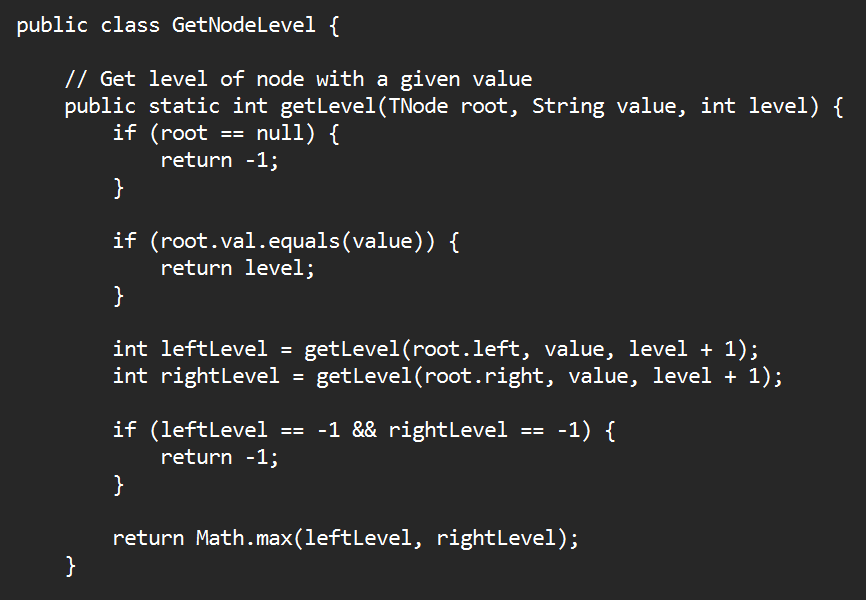

## Get height

Height: The length of the **longest path** from a **node to one of its leaf nodes**

The height of a Tree is equal to the maximum level of any node in tree


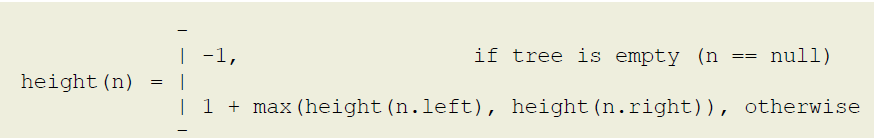

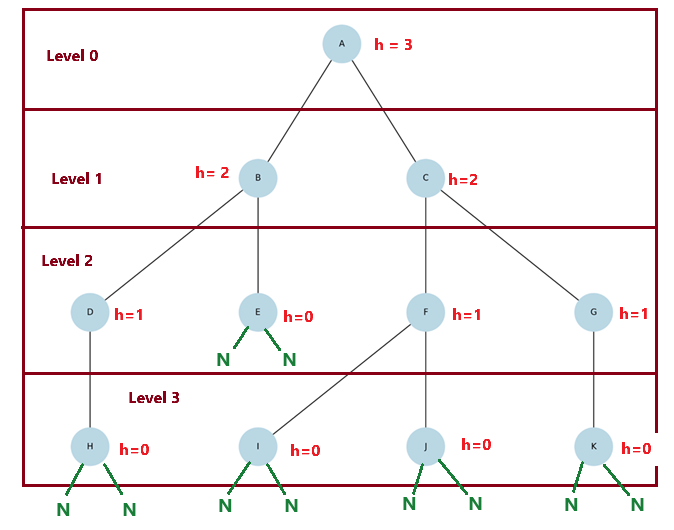

In [ ]:
# Gets the height of the tree from a specific node
def get_height(node):
    # Base Case: If the node is None, the height is -1 (empty tree)
    if node is None:
        return -1

    # Recursive Case: Get the heights of the left and right subtrees
    left_height = get_height(node.left)
    right_height = get_height(node.right)

    # Compute the height of the current subtree as 1 + maximum of left and right heights
    return 1 + max(left_height, right_height)


# Print heights of specific nodes
print('----------------')
print(f"Height of '{root.val}':", get_height(root))
print(f"Height of '{root.left.val}':", get_height(root.left))
print(f"Height of '{root.right.left.val}':", get_height(root.right.left))
print(f"Height of '{root.right.left.left.val}':", get_height(root.right.left.left))

----------------
Height of 'A': 3
Height of 'B': 2
Height of 'F': 1
Height of 'I': 0


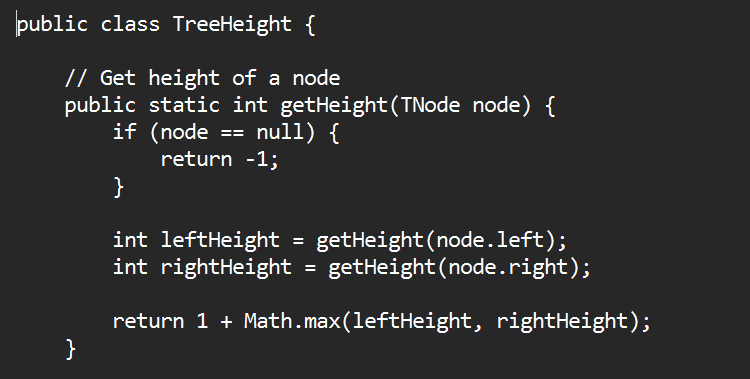

## Get size

In [ ]:
# Gets the size of the tree (total number of nodes)
def get_size(node):
    # Base case: If the node is None, the size is 0
    if node is None:
        return 0

    # Recursive case: The size is the current node (1) + size of left subtree + size of right subtree
    return 1 + get_size(node.left) + get_size(node.right)

# Get the size of the tree
print('----------------')
print(f"Size of the tree: {get_size(root)}")

----------------
Size of the tree: 11


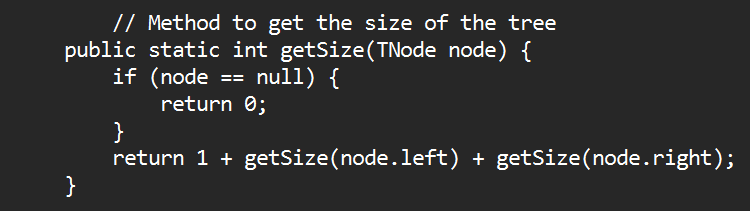

#### Full Binary Tree or Not

Full/Strict Binary Tree:
- 1. Every node has either 0 or 2 children.
- 2. No of leaf nodes = no of internal nodes + 1


In [ ]:
class TNode:
    def __init__(self, val, left=None, right=None):
        self.val = val    # Node value
        self.left = left  # Left child
        self.right = right  # Right child

# Function to check if the binary tree is a full binary tree
def isFullTree(root):
    # Base case: If the node is None, it's a valid full binary tree (empty tree is full)
    if root is None:
        return True

    # If the node has no children (it's a leaf), it's valid
    if root.left is None and root.right is None:
        return True

    # If the node has both children, check if both left and right subtrees are full
    if root.left is not None and root.right is not None:
        return isFullTree(root.left) and isFullTree(root.right)

    # If the node has one child only, it's not a full binary tree
    return False


# Driver code
tree_arr = [None, "A", "B", "C", "D", "E", "F", "G", "H", None, None, None, "I", "J", None, "K"]
root = arr_to_tree(np.array(tree_arr))
"""
          A
         / \
        B   C
       / \ / \
      D  E F  G
     /   /
    H   I
       /
      J
         \
          K

"""
# Check if the tree is a full binary tree
if isFullTree(root):
    print("The tree is a full binary tree.")
else:
    print("The tree is not a full binary tree.")

###################################################################
tree_arr = [None, "A", "B", "C", "D", "E", "F", "G"]
root = arr_to_tree(np.array(tree_arr))
"""
        A
       / \
      B   C
     / \ / \
    D  E F  G
"""
# Check if the tree is a full binary tree
if isFullTree(root):
    print("The tree is a full binary tree.")
else:
    print("The tree is not a full binary tree.")

The tree is not a full binary tree.
The tree is a full binary tree.


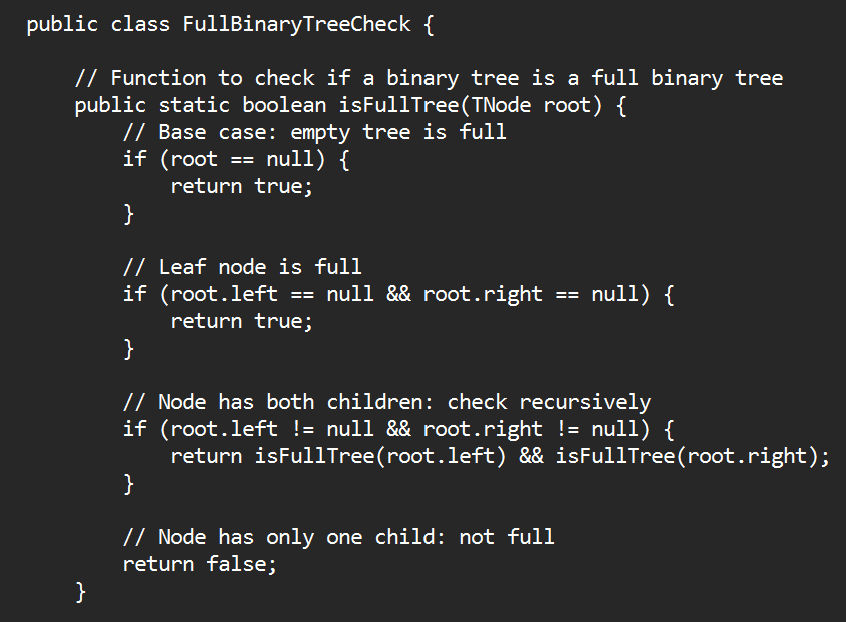

#### Balanced Binary Tree or Not

Balanced/ Height-balanced Binary Tree:
The **height of the left and right subtree** of any node differ by **not more than 1.**



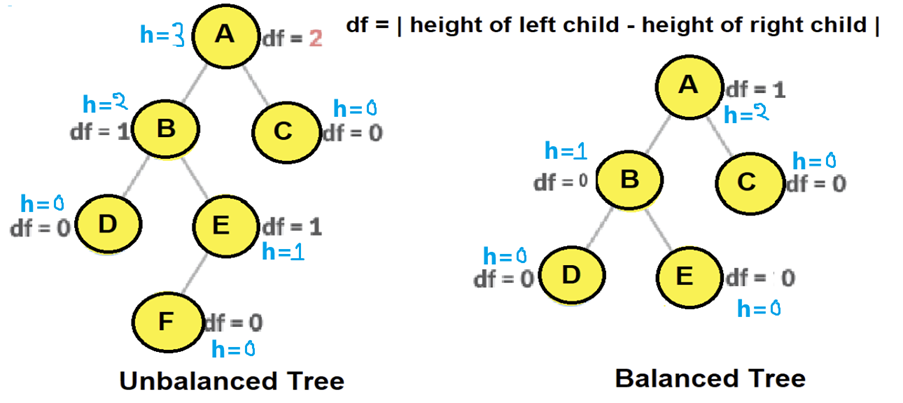

In [ ]:
class TNode:
    def __init__(self, val, left=None, right=None):
        self.val = val    # Node value
        self.left = left  # Left child
        self.right = right  # Right child

# Function to calculate the height difference between left and right subtrees
def get_df(node):
    # Base case: if node is None, return 0
    if node is None:
        return 0

    # Get the height of left and right subtrees
    left_height = get_height(node.left)
    right_height = get_height(node.right)

    # Calculate the difference in height (df)
    return abs(left_height - right_height)


# Function to check if the binary tree is height-balanced
def isBalanced(root):
    # A tree is height-balanced if the height difference of left and right subtrees is at most 1 for each node
    if root is None:
        return True  # An empty tree is balanced

    # Get the height difference for the root node
    df = get_df(root)

    # If the height difference is more than 1, the tree is not balanced
    if df > 1:
        return False

    # Recursively check for balance in left and right subtrees
    return isBalanced(root.left) and isBalanced(root.right)

######################################################
tree_arr_balanced = [None, "A", "B", "C", "D", "E", "F", "G"]
                  #   0     1    2    3    4    5    6    7
"""
        A
       / \
      B   C
     / \ / \
    D  E F  G

"""
root2 = arr_to_tree(np.array(tree_arr_balanced))
# Check if the tree is balanced
if isBalanced(root2):
    print("The tree is balanced.")
else:
    print("The tree is not balanced.")

######################################################
tree_arr_unbalanced = [None, "A", "B", None, "C", "D",  None,  None, "E"]
                    #   0     1    2    3     4    5      6     7     8
"""
        A
       /
      B
     / \
    C   D
   /
  E
"""
root3 = arr_to_tree(np.array(tree_arr_unbalanced))
# Check if the tree is balanced
if isBalanced(root3):
    print("The tree is balanced.")
else:
    print("The tree is not balanced.")

The tree is balanced.
The tree is not balanced.


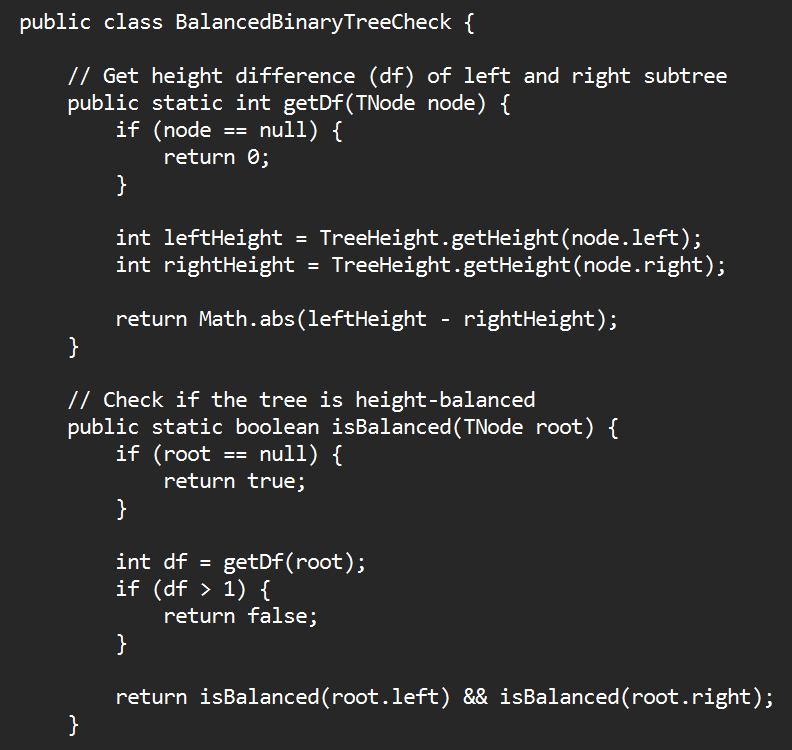

#### Perfect Binary Tree or Not

Perfect Binary Tree:
1. Every internal node has **exactly two child** nodes and
2. all the leaf nodes are at the same level.


In [ ]:
# DEBUGGED
import numpy as np

class TNode:
    def __init__(self, val, left=None, right=None):
        self.val = val    # Node value
        self.left = left  # Left child
        self.right = right  # Right child


# calculate the depth/level of the tree
def get_level(node, level=0):
    if node is None:
        return level
    left_level = get_level(node.left, level + 1)
    right_level = get_level(node.right, level + 1)
    return max(left_level, right_level)

# check if the tree is a perfect binary tree
def isPerfectTree(root, level=0):
    # Base condition: if the tree is empty
    if root is None:
        return True

    # If the node is a leaf node
    if root.left is None and root.right is None:
        return True

    # If its not a leaf node, passed in the last check,
    # then its an internal node
    # If the internal node does not have exactly two children, return False
    if root.left is None or root.right is None:
        return False

    # Recursively check the left and right subtrees for exactly two childs,
    #and also compare the levels of both subtrees
    return isPerfectTree(root.left, level + 1) and \
    isPerfectTree(root.right, level + 1) \
    and (get_level(root.right)==get_level(root.left)) #checking the current level

# Driver code
tree_arr1 = [None, "A", "B", "C", "D", "E", "F", "G" ]
         #   0      1    2    3    4    5    6    7

"""
        A
       / \
      B   C
     / \ / \
    D  E F  G

"""

root1 = arr_to_tree(np.array(tree_arr1))

# Check if the tree is a perfect binary tree
if isPerfectTree(root1):
    print("The tree is a perfect binary tree.")
else:
    print("The tree is not a perfect binary tree.")

##############################################################

# Driver code
tree_arr2 = [None, "A", "B", "C", "D", "E", None, None ]
           #   0     1    2    3    4    5    6     7
root2 = arr_to_tree(np.array(tree_arr2))

"""
        A
       / \
      B   C
     / \
    D   E
"""

# Check if the tree is a perfect binary tree
if isPerfectTree(root2):
    print("The tree is a perfect binary tree.")
else:
    print("The tree is not a perfect binary tree.")


The tree is a perfect binary tree.
The tree is not a perfect binary tree.


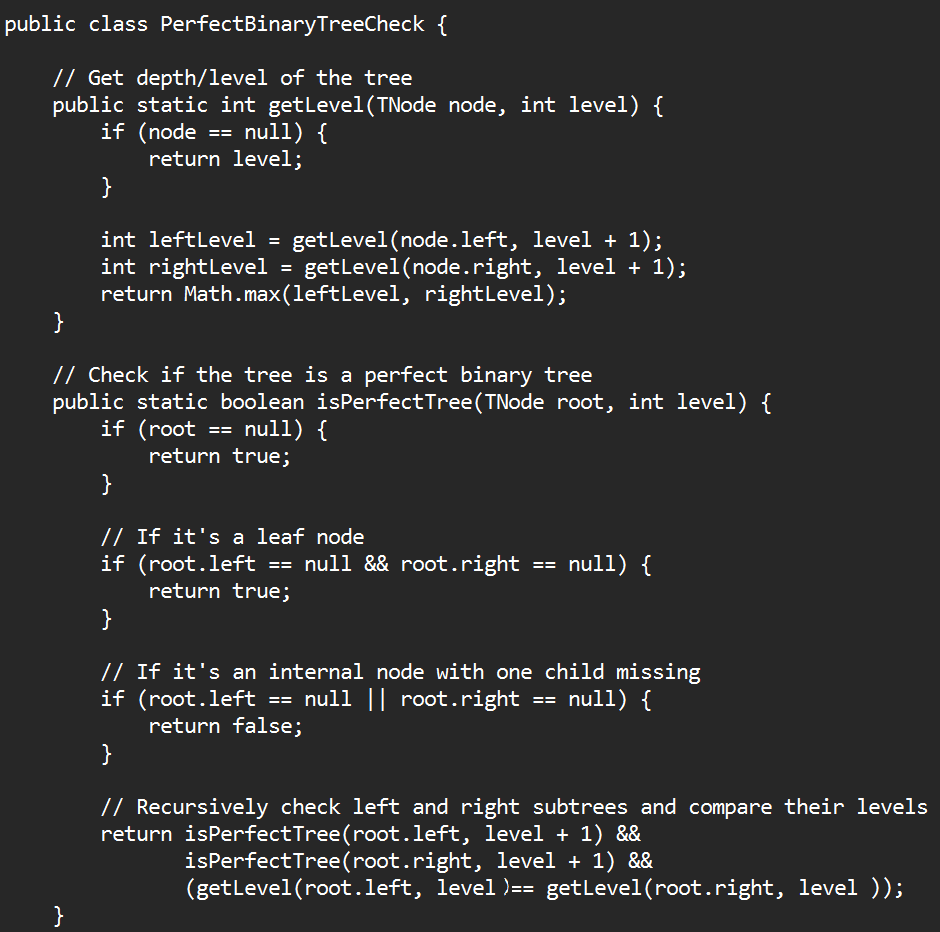

#### Complete Binary Tree:
- 1) All internal nodes with two children.
- 2) If an internal node has one child, it must be on the left.


In [ ]:
import numpy as np

class TNode:
    def __init__(self, val, left=None, right=None):
        self.val = val    # Node value
        self.left = left  # Left child
        self.right = right  # Right child

def is_complete(node, index, total_nodes):
    if node is None:
        return True
    if index > total_nodes:
        return False
    return (is_complete(node.left, 2 * index, total_nodes) and
            is_complete(node.right, 2 * index + 1, total_nodes))

# Tree 1: Complete Binary Tree
#       1
#     /   \
#    2     3
#   /
#  6

tree1 = TNode(1)
tree1.left = TNode(2)
tree1.right = TNode(3)
tree1.left.left = TNode(6)


# Tree 2: Not Complete Binary Tree
#       1
#     /   \
#    2     3
#   /  \    \
#  6    4    5


tree2 = TNode(1)
tree2.left = TNode(2)
tree2.right = TNode(3)
tree2.left.left = TNode(6)
tree2.left.right = TNode(4)
tree2.right.right = TNode(5)



# Check Tree 1
nodes1 = get_size(tree1)
print("Tree 1 is complete:", is_complete(tree1, 1, nodes1))  # Expected: True

# Check Tree 2
nodes2 = get_size(tree2)
print("Tree 2 is complete:", is_complete(tree2, 1, nodes2))  # Expected: False

Tree 1 is complete: True
Tree 2 is complete: False


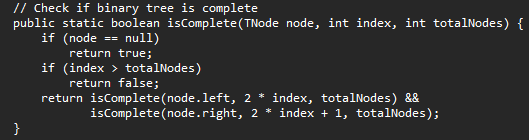